In this piece of code we define a simple function (overlay_salmap). What does it do? <br\>
overlay_salmap get two images:
- an actual image (a frame of a video)
- a saliency map

And it outputs the image with the saleincy map overlayed on it.

First we import the saliency map generation module

In [ ]:
from gen_sal_map import *

In [ ]:
fix_obj = FixationLoader()
fixation_data = fix_obj.get_video_fixation('Data.mat')
Z = vid_sal_map(fixation_data[0:1, :, :])
print(Z.shape)

plt.pcolor(Z[0, :, :], alpha=.2)
plt.axes().set_aspect('equal')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

Now we import an image and display it with the distribution shown above

In [ ]:
# display the image first (we can just take another frame of fixaation data as the mock image!)
img = vid_sal_map(fixation_data[50:51, :, :])
plt.pcolor(img[0, :, :], cmap='gray')
plt.axes().set_aspect('equal')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [ ]:
plt.pcolor(img[0, :, :], cmap='gray')
plt.pcolor(Z[0, :, :], alpha=.1)
plt.axes().set_aspect('equal')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [ ]:
Z = Z.astype(np.float32)
Z = np.concatenate((Z,Z), axis=0)
Z = np.concatenate((Z,Z), axis=0)
print(Z.shape)

In [ ]:
Z = Z.transpose(1,2,0);

In [ ]:
def overlay_sal_map(img, sal_map):
    
    cdict = {'red':   [(0.0,  0.0, 0.0),
                       (0.5,  0.0, 0.5),
                       (1.0,  1.0, 1.0)],

             'green': [(0.0,  0.0, 0.0),
                       (0.25, 0.0, 0.0),
                       (0.5,  1.0, 1.0),
                       (1.0,  0.0, 1.0)],

             'blue':  [(0.0,  0.0, 1.0),
                       (0.5,  0.0, 0.0),
                       (1.0,  0.0, 0.0)],

             'alpha':  [(0.0,  0.0, 0.0),
                       (0.6,  0.4, 0.4),
                       (1.0,  0.4, 0.4)]}
    
    my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    
    plt.imshow(img)
    plt.imshow(sal_map, cmap=my_cmap)
    plt.axes().set_aspect('equal')
    plt.colorbar()
    plt.show()

## Summary

In [1]:
from gen_sal_map import *

In [2]:
fix_obj = FixationLoader()
fixation_data = fix_obj.get_video_fixation('Data.mat')
Z = vid_sal_map(fixation_data[0:1, :, :])
print(Z.shape)

Computing saliency map for 1 frame..
Frame 0 is done
=== Sliency map is computed for all frames ===
(1, 101, 101)


In [3]:
# create an imaginary image!
img = vid_sal_map(fixation_data[50:51, :, :])
img1 = img.transpose(1,2,0)
img = np.concatenate((img1,img1), axis=-1)
img = np.concatenate((img,img1), axis=-1)

Computing saliency map for 1 frame..
Frame 0 is done
=== Sliency map is computed for all frames ===


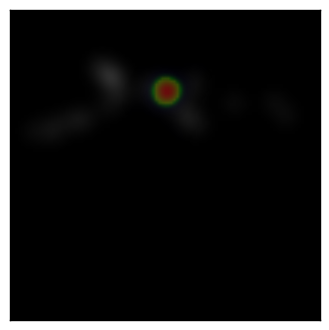

In [4]:
sal_map = np.squeeze(Z.transpose(1,2,0))
overlay_sal_map(img, sal_map)